In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt

from mrf_cut import segment_image
from bar_example import create_bar, bar_generator, add_gray_noise, add_flip_noise

In [2]:

results = np.load("output/5p2_results.npy")
results.shape # b, perc, trials, accs...
results[..., 0].shape

(8, 12, 10)

In [3]:
betas = np.linspace(0.1, 4, 8)
percs = np.linspace(0.05, 0.5, 12)
rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        # z is thing... 
        for mle, map in z:
            rows.append([b, p, mle, map])
df = pd.DataFrame(rows, columns=["B", "P", "mle", "map"])
df["loss"] = df["map"] / df["mle"] # I want a smaller loss for map than mle, so this still tracks..
sns.lineplot(df, x="P", y="loss", hue="B")

,B,P,mle,map
0,0.1,0.05,0.090176,0.090176
1,0.1,0.05,0.061649,0.061649
2,0.1,0.05,0.042514,0.042514
3,0.1,0.05,0.052437,0.052437
4,0.1,0.05,0.058993,0.058993
...,...,...,...,...
955,4.0,0.50,0.477056,0.500000
956,4.0,0.50,0.594164,0.500000
957,4.0,0.50,0.576098,0.500000
958,4.0,0.50,0.444458,0.500000


(0.0, 0.5)

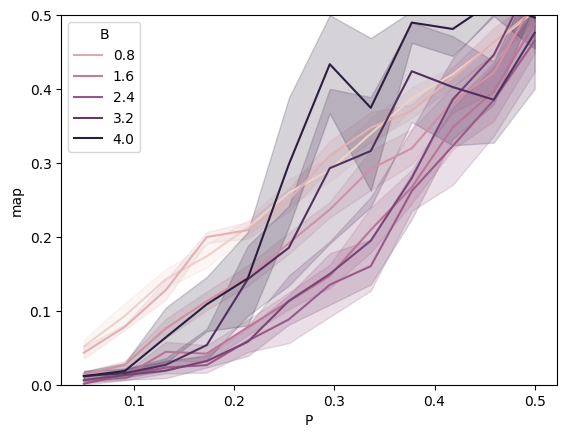

In [28]:

results = np.load("output/5p2_results.npy")
betas = np.linspace(0.1, 4, 8)
percs = np.linspace(0.05, 0.5, 12)
rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        # z is thing... 
        for mle, map in z:
            rows.append([b, p, mle, map])
df = pd.DataFrame(rows, columns=["B", "P", "mle", "map"])
df["loss"] = df["map"] / df["mle"] # I want a smaller loss for map than mle, so this still tracks..
sns.lineplot(df, x="P", y="map", hue="B")
plt.gca().set_ylim([0, 0.5])

(0.0, 2.0)

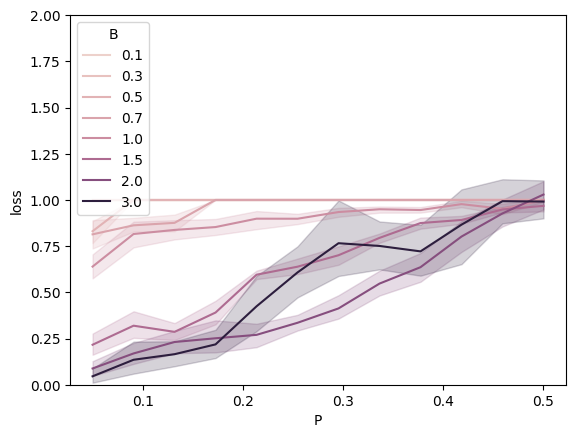

In [37]:

results_v0 = np.load("output/5p2_results.npy")
betas =np.array([0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0])
percs = np.linspace(0.05, 0.5, 12)
rows = []
for b, r in zip(betas, results_v0):
    for p, z in zip(percs, r):
        # z is thing... 
        for mle, map in z:
            rows.append([b, p, mle, map])
df2 = pd.DataFrame(rows, columns=["B", "P", "mle", "map"])
df2["loss"] = df2["map"] / df2["mle"] # I want a smaller loss for map than mle, so this still tracks..
sns.lineplot(df2, x="P", y="loss", hue="B", legend="full")
plt.gca().set_ylim([0, 2])

(0.0, 2.0)

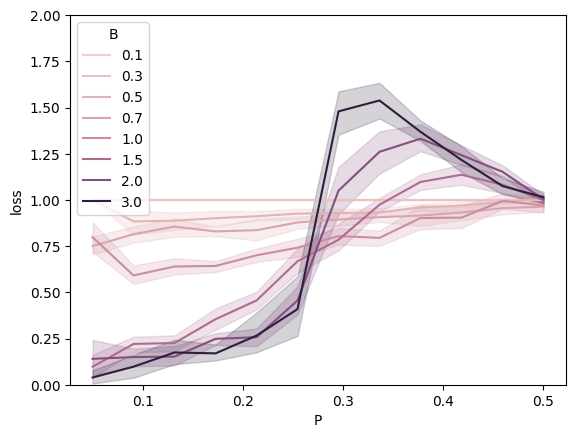

In [36]:

results = np.load("output/5p2_results.npy")
betas =np.array([0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0])
percs = np.linspace(0.05, 0.5, 12)
rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        # z is thing... 
        for mle, map in z:
            rows.append([b, p, mle, map])
df = pd.DataFrame(rows, columns=["B", "P", "mle", "map"])
df["loss"] = df["map"] / df["mle"] # I want a smaller loss for map than mle, so this still tracks..
sns.lineplot(df, x="P", y="loss", hue="B", legend="full")
plt.gca().set_ylim([0, 2])

In [46]:
df

,B,P,mle,map,loss
0,0.1,0.05,0.060235,0.060235,1.000000
1,0.1,0.05,0.056867,0.056867,1.000000
2,0.1,0.05,0.027099,0.027099,1.000000
3,0.1,0.05,0.051906,0.051906,1.000000
4,0.1,0.05,0.046413,0.046413,1.000000
...,...,...,...,...,...
955,4.0,0.50,0.452780,0.350524,0.774160
956,4.0,0.50,0.518341,0.633900,1.222940
957,4.0,0.50,0.463062,0.401259,0.866534
958,4.0,0.50,0.472274,0.605911,1.282966


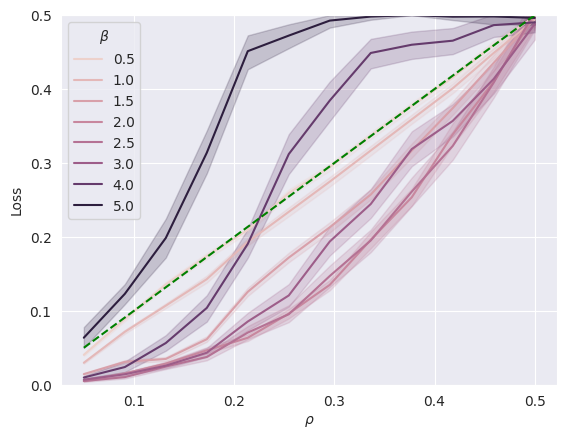

In [51]:

results = np.load("output/5p2_results.npy")
betas = np.linspace(0.1, 4, 8)
betas = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0])  # np.linspace(0.1, 2, 8)
percs = np.linspace(0.05, 0.5, 12)
rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        # z is thing... 
        for mle, map in z:
            rows.append([b, p, mle, map])
df = pd.DataFrame(rows, columns=["$\\beta$", "$\\rho$", "mle", "Loss"])
df["loss"] = df["Loss"] / df["mle"] # I want a smaller loss for map than mle, so this still tracks..
with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="$\\rho$", y="Loss", hue="$\\beta$", legend="full")
    plt.gca().plot(percs, percs, "g--")
    plt.gca().set_ylim([0, .5])

(0.0, 0.5)

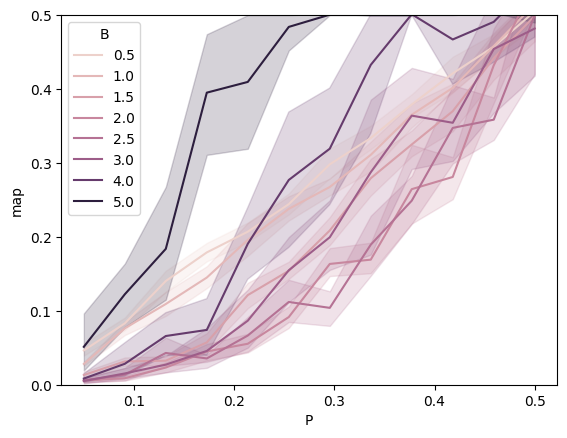

In [49]:

results = np.load("output/5p2_results.npy")
betas = np.linspace(0.1, 4, 8)
betas = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0])  # np.linspace(0.1, 2, 8)
percs = np.linspace(0.05, 0.5, 12)
rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        # z is thing... 
        for mle, map in z:
            rows.append([b, p, mle, map])
df = pd.DataFrame(rows, columns=["B", "P", "mle", "map"])
df["loss"] = df["map"] / df["mle"] # I want a smaller loss for map than mle, so this still tracks..
sns.lineplot(df, x="P", y="map", hue="B", legend="full")
plt.gca().set_ylim([0, .5])

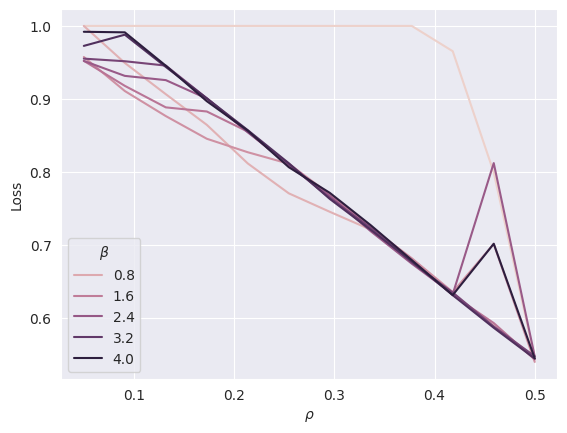

In [31]:
betas = np.linspace(0.1, 4, 8)
percs = np.linspace(0.05, 0.5, 12)
results = np.load("output/5p2_results.npy")

rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        rows.append([b, p, z])
df = pd.DataFrame(rows, columns=["$\\beta$", "$\\rho$", "loss"])

with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="$\\rho$", y="loss", hue="$\\beta$")
    plt.gca().set_ylabel("Loss")

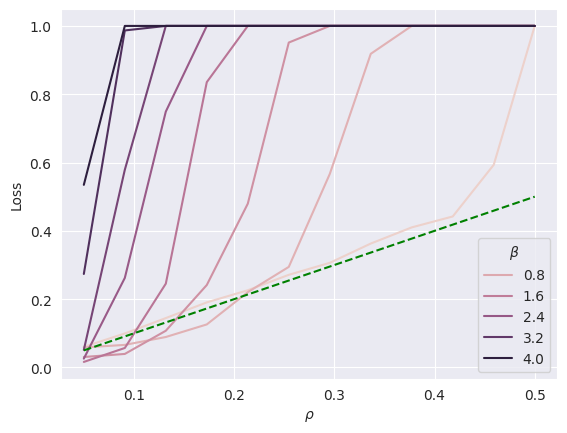

In [29]:
betas = np.linspace(0.1, 4, 8)
percs = np.linspace(0.05, 0.5, 12)
results = np.load("output/5p2_results.npy")

rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        rows.append([b, p, z])
df = pd.DataFrame(rows, columns=["$\\beta$", "$\\rho$", "loss"])

with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="$\\rho$", y="loss", hue="$\\beta$")
    plt.gca().plot(percs, percs, "g--")
    plt.gca().set_ylabel("Loss")

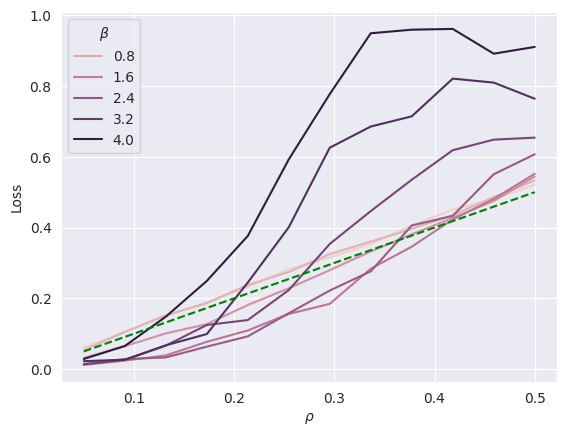

In [28]:
betas = np.linspace(0.1, 4, 8)
percs = np.linspace(0.05, 0.5, 12)
results = np.load("output/5p2_results.npy")

rows = []
for b, r in zip(betas, results):
    for p, z in zip(percs, r):
        rows.append([b, p, z])
df = pd.DataFrame(rows, columns=["$\\beta$", "$\\rho$", "loss"])

with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="$\\rho$", y="loss", hue="$\\beta$")
    plt.gca().plot(percs, percs, "g--")
    plt.gca().set_ylabel("Loss")

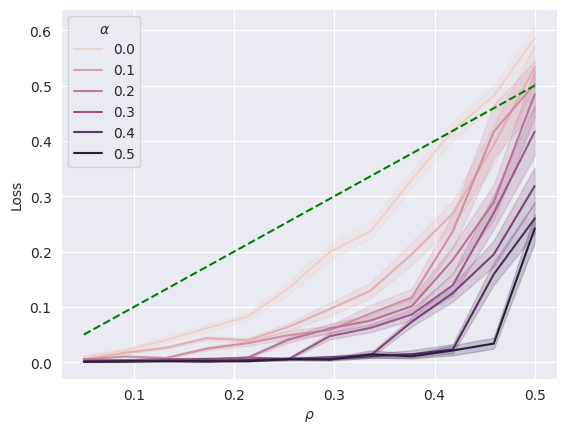

In [55]:
probas = np.linspace(0, 0.5, 8)
percs = np.linspace(0.05, 0.5, 12)
results = np.load("output/5p3_results.npy")
rows = []
for b, r in zip(probas, results):
    for p, z in zip(percs, r):
        # z is thing... 
        for zi in z:
            rows.append([b, p, zi])
# for b, r in zip(probas, results):
#     for p, z in zip(percs, r):
#         rows.append([b, p, z])
df = pd.DataFrame(rows, columns=["$\\alpha$", "$\\rho$", "Loss"])
with sns.axes_style("darkgrid"):
    sns.lineplot(df, x="$\\rho$", y="Loss", hue="$\\alpha$")
    plt.gca().plot(percs, percs, "g--")
    plt.gca()

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
fig.set_constrained_layout(True)

rho = 0.2
bar_ref = create_bar()
dens = np.mean(bar_ref == 0)

avg_1 = np.sqrt(np.mean(bar_ref == 1))

def custom_pairwise1(val1, val2, *args):
    return .5

def custom_pairwise2(val1, val2, *args):
    return 1
    val = abs(float(val1) - float(val2))
    bp = 0.2
    val = 1 - val
    return val * bp + (1-val) * (1-bp) * 2


def unary(val, *args):
    bp = rho
    val = 1 - val
    # k = val is 1
    
    # return (1 - val) * (1 - rho) * dens + val * rho * dens, (1 - val) * (1- dens) * rho + val * (1 - rho) * (1 - dens)
    proba_1 = bp ** (1 - val) * (1 - bp) ** val
    return proba_1, (1 -proba_1)
    return val * (1 - bp) + bp * (1-val), (1-val)*(1 - bp) + bp * (val)


noisy = add_flip_noise(bar_ref, rho)
map_bar1 = segment_image(noisy, unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise2)
map_bar2 = segment_image(noisy, unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise1)
noisy_mesh = axs[0].pcolormesh(noisy, vmin=0, vmax=1)
map_mesh = axs[1].pcolormesh(map_bar1, vmin=0, vmax=1)
map_mesh2 = axs[2].pcolormesh(map_bar2, vmin=0, vmax=1)
plt.close()
# This function updates the y-data of the line for each frame
def update(i):
    noisy = add_flip_noise(bar_ref, rho)
    map_bar1 = segment_image(np.array(noisy), unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise2)
    map_bar2 = segment_image(np.array(noisy), unary_potential_fnc=unary, pairwise_potential_fnc=custom_pairwise1)
    
    noisy_mesh.set_array(noisy)
    map_mesh.set_array(map_bar1)
    map_mesh2.set_array(map_bar2)
    return noisy_mesh, map_mesh, map_mesh2

ani = FuncAnimation(fig, update, frames=range(5), blit=False, interval=100)
HTML(ani.to_jshtml())

In [19]:
dens

0.0810546875